In [265]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')



In [266]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [267]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices', con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

# Investigate the data, and do any necessary data cleaning.

In [268]:
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [269]:
houseprices_df1=houseprices_df #make a copy

In [270]:
np.array(houseprices_df1.isnull().sum()*100/len(houseprices_df1))

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.77397260e+01,
       0.00000000e+00, 0.00000000e+00, 9.37671233e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.47945205e-01, 5.47945205e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.53424658e+00, 2.53424658e+00,
       2.60273973e+00, 2.53424658e+00, 0.00000000e+00, 2.60273973e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.84931507e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [271]:
numeric_columns= houseprices_df1.select_dtypes(['int64', 'float64']).columns
    

In [272]:
houseprices_df1.alley.unique() # replace None with NO ALLEY, the use dummies. 

array([None, 'Grvl', 'Pave'], dtype=object)

In [273]:
houseprices_df1['alley']=houseprices_df1['alley'].apply(str).replace('None', 'No alley')
#youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)

In [274]:
houseprices_df1.poolqc.unique()

array([None, 'Ex', 'Fa', 'Gd'], dtype=object)

In [275]:
houseprices_df1.poolqc.value_counts() # is it appropriate to drop?

Gd    3
Fa    2
Ex    2
Name: poolqc, dtype: int64

In [276]:
houseprices_df1.miscfeature.unique()

array([None, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [277]:
houseprices_df1.miscfeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: miscfeature, dtype: int64

In [278]:
houseprices_df['alley']=houseprices_df['alley'].apply(str).replace('None', 'No alley')
houseprices_df['masvnrtype']=houseprices_df['masvnrtype'].apply(str).replace('None', 'Other')

In [279]:
houseprices_df1.masvnrtype.unique()

array(['BrkFace', 'Other', 'Stone', 'BrkCmn'], dtype=object)

In [280]:
houseprices_df1.salecondition.unique()


array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [281]:
houseprices_df1.saletype.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [282]:
houseprices_df1.drop(columns=['poolqc','miscfeature', 'miscval' ], axis=1, inplace=True) #dropped some columns with 
#many missing values. 


In [283]:
#Replacing some of the continuous variables with missing values with mean. There's only two. 
houseprices_df1['lotfrontage'].fillna(houseprices_df1['lotfrontage'].mean, inplace=True)
houseprices_df1['masvnrarea'].fillna(houseprices_df1['masvnrarea'].mean, inplace=True)



In [284]:
houseprices_df1.isnull().sum()*100/len(houseprices_df1)
#there's still many categorical values with missing data. We don't have to use all of the features. We will leave 
#it for now. 

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage       0.000000
lotarea           0.000000
street            0.000000
alley             0.000000
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.000000
masvnrarea        0.000000
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bsmthalfbath      0.000000
fullbath          0.000000
halfbath          0.000000
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
t

# Explore the data and find some variables that you think would be useful in predicting house prices.


In [285]:
# The continuous variables would be useful to compare. 
#First, let's take a look at saleprice distribution

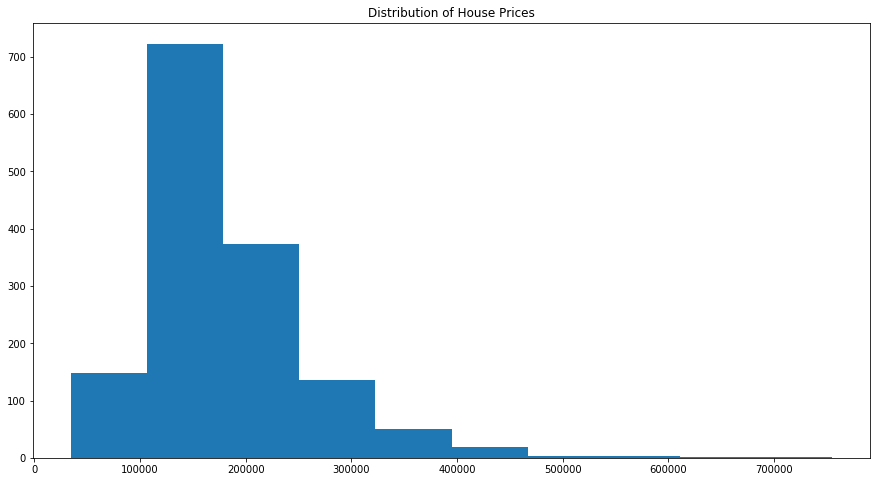

In [286]:
plt.figure(figsize=(15,8))

plt.hist(houseprices_df.saleprice)
plt.title('Distribution of House Prices')
plt.show()

In [287]:
numeric_columns= houseprices_df1.select_dtypes(['int64', 'float64'])

In [288]:
#getting dummies for categorical values I believe will have an important role in target
houseprices_df1= pd.concat([houseprices_df1,pd.get_dummies(houseprices_df1.saletype, prefix='saletype', drop_first=True)], axis=1)
houseprices_df1= pd.concat([houseprices_df1,pd.get_dummies(houseprices_df1.salecondition, prefix='salecondition', drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houseprices_df1.saletype, prefix="saletype", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houseprices_df1.salecondition, prefix="salecondition", drop_first=True).columns)

In [264]:
houseprices_df1

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,miscval,mosold,yrsold,saletype,salecondition,saleprice,saletype_1,salecondition_1,saletype_1,salecondition_1
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,2,2008,0,0,208500,0,0,0,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,5,2007,0,0,181500,0,0,0,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,9,2008,0,0,223500,0,0,0,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,2,2006,0,0,140000,0,0,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,12,2008,0,0,250000,0,0,0,0
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,700,10,2009,0,0,143000,0,0,0,0
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,8,2007,0,0,307000,0,0,0,0
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,350,11,2009,0,0,200000,0,0,0,0
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,4,2008,0,0,129900,0,0,0,0
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,1,2008,0,0,118000,0,0,0,0


In [261]:
numeric_columns.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lotarea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Build your initial model using these features and estimate the parameters using OLS.

In [290]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]
Y = houseprices_df1.saleprice

In [294]:
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = np.array(Y) - predictions

# Estimated coefficients.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 0.00000000e+00  2.19433935e+04  4.67347127e+01  1.44154808e+04
  1.37619306e+01  3.05115938e+01  2.80224421e+04  5.93709162e+04
  5.06740041e+03  2.39017827e+04  1.91415467e+04  4.38897263e+04
  4.76322958e+04  1.60834634e+04  1.72728084e+04  5.74863577e+03
 -1.52969884e+04  8.63158428e+03  4.05441106e+03]

Intercept: 
 -113364.40548911502


### Assumption 2 :the error term should be zero on average 

In [296]:

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))
#zero average

Mean of the errors in the medical costs model is: -1.4352573923868675e-11


### Assumption three: homoscedasticity

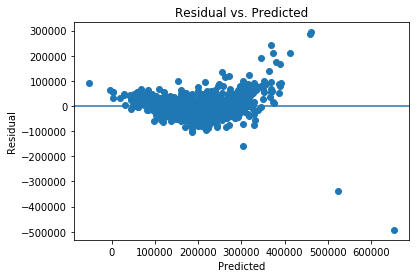

In [297]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [298]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 510.674 and p value is 4.53e-113
Levene test statistic value is 471.591 and p value is 4.69e-97


In [299]:
#unreliable estimation. P values are insignificant which means heterscedasticity

### Assumption four: low multicollinearity

In [300]:
X.corr()

,const,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overallqual,NaN,1.000000,0.593007,0.600671,0.562022,0.537808,0.034147,0.037524,-0.037305,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
grlivarea,NaN,0.593007,1.000000,0.467247,0.468997,0.454868,0.030312,0.008287,-0.016628,0.017268,-0.022348,0.168368,-0.036522,-0.121102,-0.040208,0.032283,-0.007743,-0.091572,0.163239
garagecars,NaN,0.600671,0.467247,1.000000,0.882475,0.434585,-0.036282,0.011545,-0.022304,0.002580,-0.044502,0.286290,-0.087089,-0.197458,-0.106443,0.028378,-0.010589,-0.121886,0.282164
garagearea,NaN,0.562022,0.468997,0.882475,1.000000,0.486665,-0.038068,0.012220,-0.002572,-0.005535,-0.041904,0.296671,-0.080601,-0.218665,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
totalbsmtsf,NaN,0.537808,0.454868,0.434585,0.486665,1.000000,0.008494,0.015207,-0.031424,0.019271,-0.039543,0.265644,0.003646,-0.212851,-0.055895,-0.047002,0.019569,-0.160222,0.266268
saletype_CWD,NaN,0.034147,0.030312,-0.036282,-0.038068,0.008494,1.000000,-0.001941,-0.004128,-0.003073,-0.003073,-0.015827,-0.002378,-0.134295,-0.002747,-0.004772,0.106555,-0.043784,-0.016038
saletype_Con,NaN,0.037524,0.008287,0.011545,0.012220,0.015207,-0.001941,1.000000,-0.002917,-0.002171,-0.002171,-0.011184,-0.001681,-0.094896,-0.001941,-0.003372,-0.004365,0.017320,-0.011333
saletype_ConLD,NaN,-0.037305,-0.016628,-0.022304,-0.002572,-0.031424,-0.004128,-0.002917,1.000000,-0.004617,-0.004617,-0.023782,-0.003574,-0.201789,-0.004128,-0.007170,-0.009282,-0.031583,0.007176
saletype_ConLI,NaN,0.004269,0.017268,0.002580,-0.005535,0.019271,-0.003073,-0.002171,-0.004617,1.000000,-0.003436,-0.017701,-0.002660,-0.150198,-0.003073,-0.005337,-0.006909,-0.003139,-0.017938


In [ ]:
#maybe removing garage cars or garage area? 

### Assumption five: error terms should be uncorrelated with one other

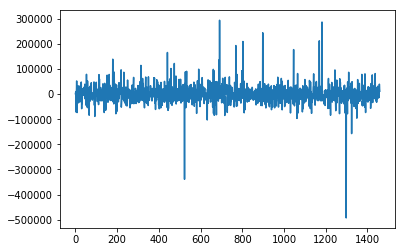

In [301]:
plt.plot(errors)
plt.show()

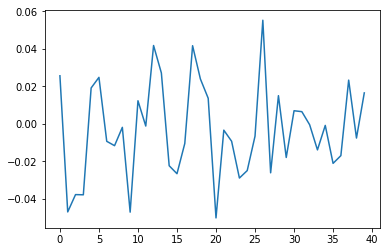

In [302]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [303]:
#looks like errors are uncorrelated with each other

### Assumption six: features shouldn't be correlated with the errors

In [304]:
df = pd.concat([X, pd.DataFrame(errors, columns=["error"])], axis=1)
df.corr().iloc[:,-1:]


,error
const,NaN
overallqual,-4.327899e-14
grlivarea,-3.132825e-14
garagecars,-2.629061e-14
garagearea,-2.270242e-14
totalbsmtsf,-7.013174e-14
saletype_CWD,-1.871862e-15
saletype_Con,-1.813340e-15
saletype_ConLD,3.009033e-15
saletype_ConLI,-1.767418e-15


In [ ]:
#saletype_WD, saletype_ConLD, saletype_ConLw, salecondition_AdjLandis, salecondition_Alloca are correlated. Bad feature 
#selection. Try again!